In [ ]:
import pandas as pd

recipes = pd.read_parquet('recipes.parquet')
# reviews = pd.read_parquet('reviews.parquet')


# Recipes.parquet EDA

### column names and head

In [ ]:
print("Column names:", recipes.columns)
pd.options.display.max_columns = None
recipes[100000:100002]

Column names: Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
100000,105542.0,Creamy Crunchy Skillet Corn,24386,Marie,PT20M,PT5M,PT25M,2004-12-07 20:00:00+00:00,Extraordinary corn dish that is creamy with a ...,[https://img.sndimg.com/food/image/upload/w_55...,Corn,"[Vegetable, < 30 Mins, Easy]","[1, 1⁄4, 1, 1, None]","[frozen whole kernel corn, butter, sugar, corn...",5.0,18.0,172.2,8.5,5.0,20.3,71.1,24.8,2.6,2.1,3.3,6.0,None,[Melt butter in a large non stick skillet and ...
100001,105543.0,Body Parts,58104,Rita1652,None,PT10M,PT10M,2004-12-07 20:00:00+00:00,A Great punch for Halloween. Made with cranber...,[https://img.sndimg.com/food/image/upload/w_55...,Punch Beverage,"[Beverages, Pineapple, Apple, Berries, Tropica...","[8, 6, 2, 2, 6, 16, 8, 8]","[cranberry juice, sparkling apple cider, ginge...",NaN,NaN,89.0,0.2,0.0,0.0,4.8,22.3,0.2,19.3,0.2,18.0,None,"[You will also need: 1 clean, new latex glove...."


### Converting CookTime, PrepTime, TotalTime to mintues

In [ ]:
import pandas as pd
import re

# Function to parse time strings
def parse_time(time_str):
    hours = 0
    minutes = 0

    if 'H' in time_str:
        hours = int(re.search(r'(\d+)H', time_str).group(1))
    else:
      hours = 0
    if 'M' in time_str:
        minutes = int(re.search(r'(\d+)M', time_str).group(1))
    else:
      minutes = 0


    return (hours * 60) + minutes


cleaning_time = recipes[['CookTime', 'PrepTime', 'TotalTime']].fillna('0')


KeyboardInterrupt: 

In [ ]:
# prompt: # Apply the function and create new columns
# for column in cleaning_time:
#     cleaning_time[[f'{column}_Minutes']] = cleaning_time[column].apply(lambda x: pd.Series(parse_time(x)))
# print(cleaning_time)
# Use the above but section the data into parts of 100,000 and to csv

# Create an empty list to store the dataframes
dataframes = []

# Split the data into parts of 100,000
for i in range(0, len(cleaning_time), 100000):
    dataframes.append(cleaning_time.iloc[i:i+100000])

i = 1
# Apply the function and create new columns for each dataframe
for df in dataframes:
    for column in df:
        df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))

    print("part ", i, " complete")
    df.to_csv(f'cleaning_time_part_{i}.csv', index=False)
    i = i+1


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

part  1  complete


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

part  2  complete


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

part  3  complete


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

part  4  complete


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

part  5  complete


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))
<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))


part  6  complete


<ipython-input-12-b7d3de83ca6f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[f'{column}_Minutes']] = df[column].apply(lambda x: pd.Series(parse_time(x)))


In [ ]:
# prompt: concat cleaning_time_part_1 cleaning_time_part_2, cleaning_time_part_3, cleaning_time_part_13, cleaning_time_part_4, cleaning_time_part_5
# together

import pandas as pd

# Read the dataframes
df1 = pd.read_csv('cleaning_time_part_1.csv')
df2 = pd.read_csv('cleaning_time_part_2.csv')
df3 = pd.read_csv('cleaning_time_part_3.csv')
df4 = pd.read_csv('cleaning_time_part_4.csv')
df5 = pd.read_csv('cleaning_time_part_5.csv')
df6 = pd.read_csv('cleaning_time_part_6.csv')


# Concatenate the dataframes
cleaning_time = pd.concat([df1, df2, df3, df4, df5, df6])
cleaning_time = cleaning_time[["CookTime_Minutes", "PrepTime_Minutes", "TotalTime_Minutes"]]

# Print the concatenated dataframe
print(cleaning_time.shape)
print(cleaning_time.head())


(522517, 3)
   CookTime_Minutes  PrepTime_Minutes  TotalTime_Minutes
0              1440                45               1485
1                25               240                265
2                 5                30                 35
3                20              1440               1460
4                30                20                 50


In [ ]:
# prompt: add cleaning_time to recipes and save as parquet
recipes = recipes.reset_index(drop=True)
cleaning_time = cleaning_time.reset_index(drop=True)

recipes = pd.concat([recipes, cleaning_time], axis=1)
recipes.to_parquet('recipes_w_cleaning_time.parquet')


### Exploring recipe category column

In [ ]:
# Calculate the number of words in each row of the 'RecipeCategory' column.
recipes['RecipeCategory_word_count'] = recipes['RecipeCategory'].str.split().str.len()
print(recipes['RecipeCategory'].head())
print()


average_word_count = recipes['RecipeCategory_word_count'].describe()
print(average_word_count)
print()

unique_recipe_categories = len(recipes['RecipeCategory'].unique())
print(f"Number of unique recipe categories: {unique_recipe_categories}")

0    Frozen Desserts
1     Chicken Breast
2          Beverages
3           Soy/Tofu
4          Vegetable
Name: RecipeCategory, dtype: object

count    521766.000000
mean          1.435722
std           0.727993
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: RecipeCategory_word_count, dtype: float64

Number of unique recipe categories: 312


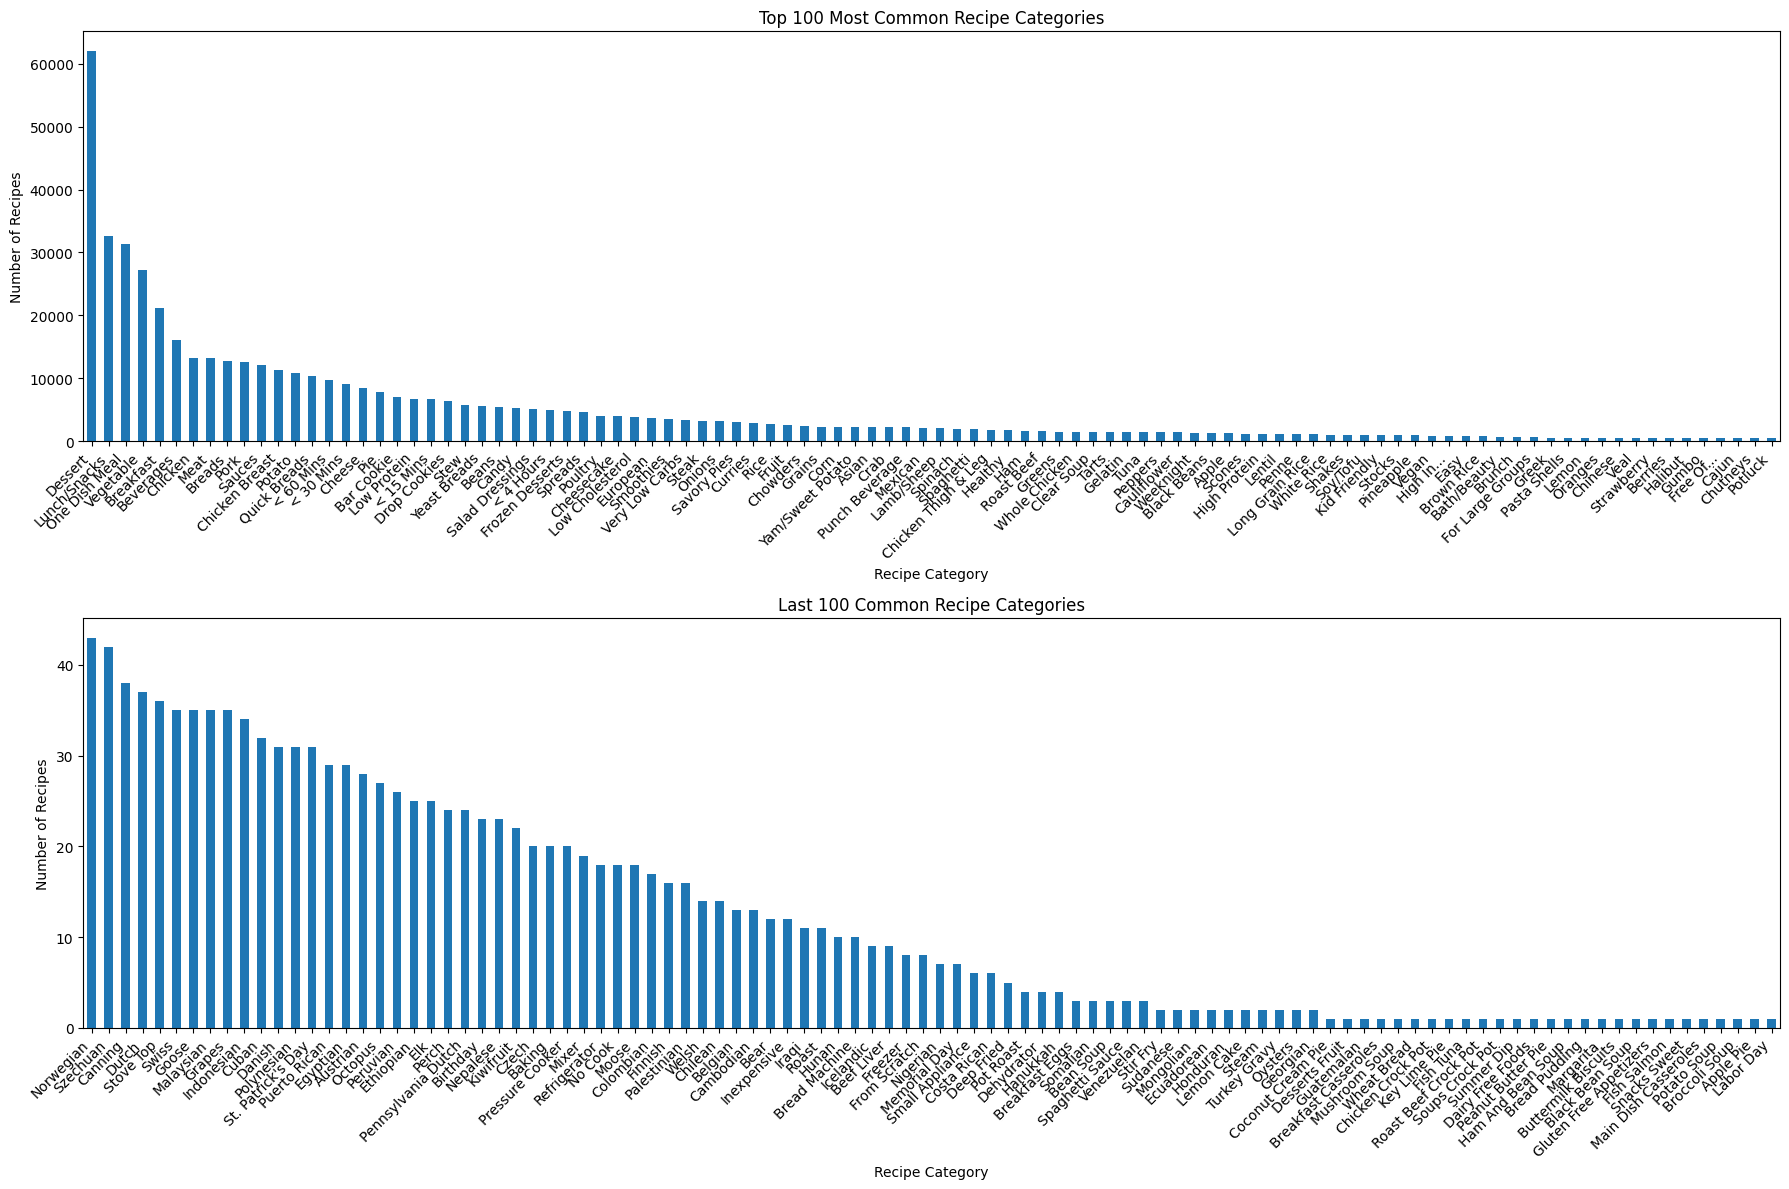

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(18, 12)) # Change variable name to fig

top_100 = recipes['RecipeCategory'].value_counts()[:100]
top_100.plot(ax=axs[0], kind='bar')
axs[0].set_ylabel('Number of Recipes') # Use axs[1] to set the xlabel
axs[0].set_xlabel('Recipe Category')
axs[0].set_title('Top 100 Most Common Recipe Categories')
plt.setp(axs[0].get_xticklabels(), rotation=45, ha='right') # Use plt.setp to rotate x-axis labels
plt.tight_layout()

last_100 = recipes['RecipeCategory'].value_counts()[-100:]
last_100.plot(ax=axs[1], kind='bar')
axs[1].set_ylabel('Number of Recipes') # Use axs[2] to set the xlabel
axs[1].set_xlabel('Recipe Category')
axs[1].set_title('Last 100 Common Recipe Categories')
plt.setp(axs[1].get_xticklabels(), rotation=45, ha='right') # Use plt.setp to rotate x-axis labels
plt.tight_layout()

plt.show()

### Exploring Keywords column

In [ ]:
recipes['Keywords_string'] = recipes['Keywords'].apply(lambda x: ' '.join(map(str, x)))

print(recipes['Keywords_string'].head())
print()

print(recipes['Keywords_string'].str.len().describe())


0    Dessert Low Protein Low Cholesterol Healthy Fr...
1    Chicken Thigh & Leg Chicken Poultry Meat Asian...
2    Low Protein Low Cholesterol Healthy Summer < 6...
3    Beans Vegetable Low Cholesterol Weeknight Broi...
4    Low Protein Vegan Low Cholesterol Healthy Wint...
Name: Keywords_string, dtype: object

count    522517.000000
mean         43.808829
std          29.424880
min           4.000000
25%          21.000000
50%          39.000000
75%          60.000000
max         322.000000
Name: Keywords_string, dtype: float64


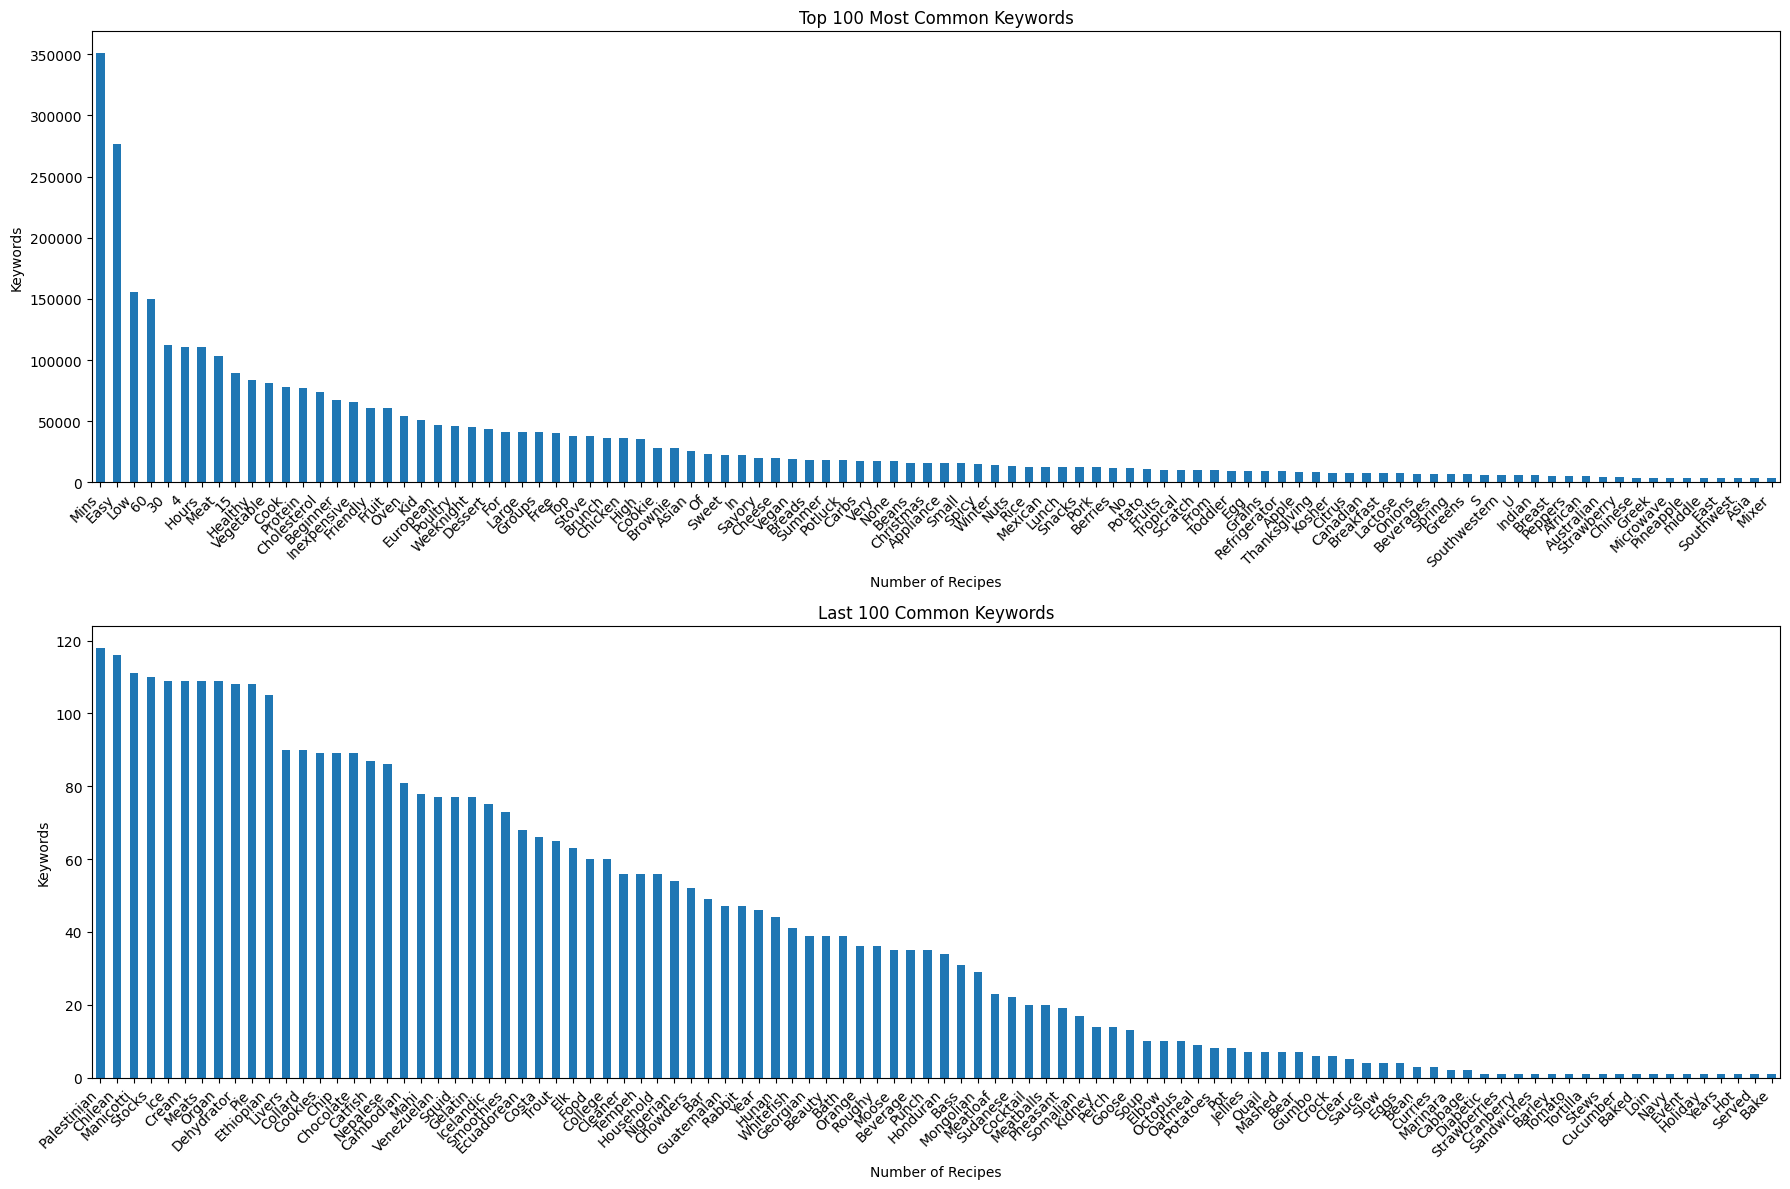

In [ ]:
import re

recipes_keywords = recipes['Keywords'].apply(lambda x: ' '.join(map(str, x))).apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))
recipes_keywords = recipes_keywords.str.split().explode().value_counts()
fig, axs = plt.subplots(2, 1, figsize=(18, 12)) # Change variable name to fig

top_100 = recipes_keywords[:100]
top_100.plot(ax=axs[0], kind='bar')
axs[0].set_xlabel('Number of Recipes') # Use axs[0] to set the xlabel
axs[0].set_ylabel('Keywords')
axs[0].set_title('Top 100 Most Common Keywords')
plt.setp(axs[0].get_xticklabels(), rotation=45, ha='right') # Use plt.setp to rotate x-axis labels
plt.tight_layout()

next_100 = recipes_keywords[-100:]
next_100.plot(ax=axs[1], kind='bar')
axs[1].set_xlabel('Number of Recipes') # Use axs[1] to set the xlabel
axs[1].set_ylabel('Keywords')
axs[1].set_title('Last 100 Common Keywords')
plt.setp(axs[1].get_xticklabels(), rotation=45, ha='right') # Use plt.setp to rotate x-axis labels
plt.tight_layout()

plt.show()

In [ ]:
# prompt: count unique values in Keywords

unique_keywords = len(recipes_keywords.unique())
print(f"Number of unique keywords: {unique_keywords}")

Number of unique keywords: 277


### Exploring Description column

In [ ]:
print(recipes['Description'].head())
print()
print(recipes['Description'][55])


Description = recipes['Description'].str.split().str.len().describe()
print()

print(Description)

0    Make and share this Low-Fat Berry Blue Frozen ...
1    Make and share this Biryani recipe from Food.com.
2    This is from one of my  first Good House Keepi...
3    This dish is best prepared a day in advance to...
4    Make and share this Cabbage Soup recipe from F...
Name: Description, dtype: object

Calzone has the same flavors as pizza, but it is made like a  huge turnover with the meat, sauce and melting cheese sealed inside. It can  stand alone as a substantial snack, or, combined with a green salad and soup, it makes an easy supper.

count    522512.000000
mean         33.207362
std          30.348588
min           1.000000
25%          11.000000
50%          24.000000
75%          44.000000
max        1168.000000
Name: Description, dtype: float64


### Exploring Name column

In [ ]:
# prompt: average number of words in column 'Name'
print(recipes['Name'].str.len().describe())
print()
print(recipes['Name'][55:59])


count    522517.000000
mean         26.649753
std          11.153294
min           2.000000
25%          19.000000
50%          25.000000
75%          33.000000
max          97.000000
Name: Name, dtype: float64

55                                     Calzone
56    Capsicum, Tomato and Crunchy Bread Salad
57                                Chaat Masala
58       Bread Pudding with Jack Daniels Sauce
Name: Name, dtype: object


### Exploring Aggregated Rating column

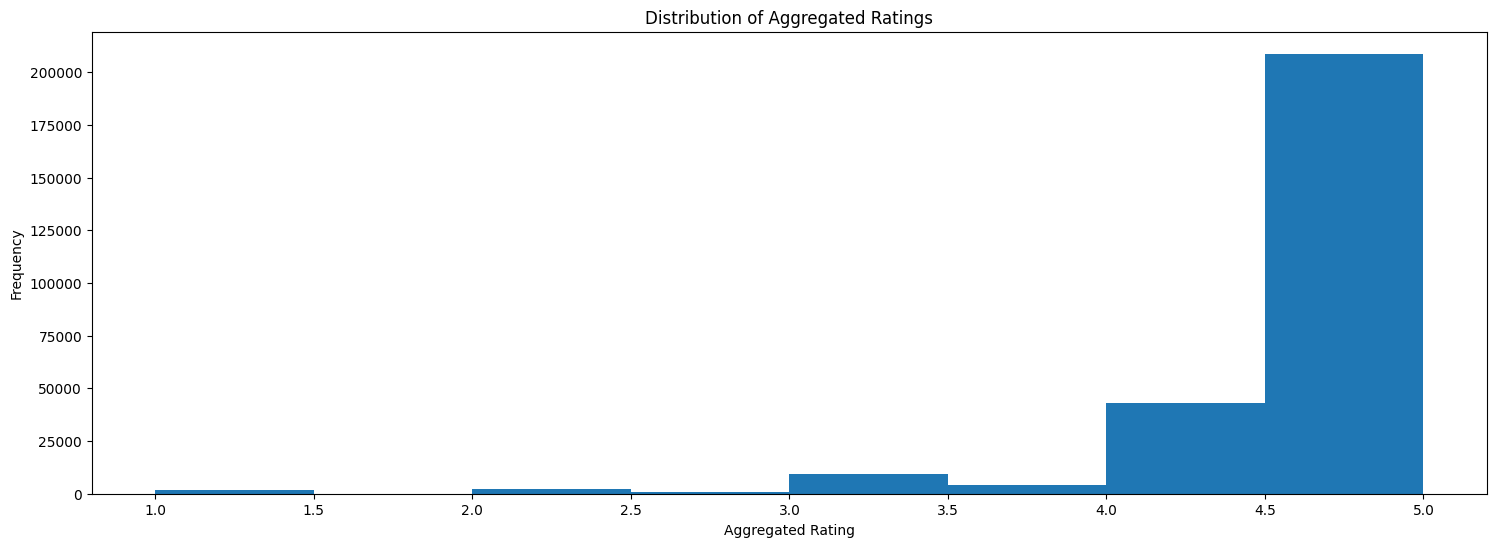

In [ ]:
# Create a histogram of the AggregatedRating column
plt.figure(figsize=(18, 6))
recipes['AggregatedRating'].plot.hist(bins=8)
plt.xlabel('Aggregated Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregated Ratings')
plt.show()


### Creating combined Key column using Name, RecipeCategory, Description, Keywords

In [ ]:
new_recipe = recipes[['Name','RecipeCategory','Description','Keywords_string','RecipeIngredientQuantities', 'RecipeIngredientParts', 'RecipeInstructions', 'AggregatedRating' , 'ReviewCount']]
new_recipe['Combined_Features'] = new_recipe[['Name','RecipeCategory','Description','Keywords_string']].fillna('  ').apply(lambda x: ' '.join(x), axis=1)
new_recipe

<ipython-input-28-bf1f22fbcd82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_recipe['Combined_Features'] = new_recipe[['Name','RecipeCategory','Description','Keywords_string']].fillna('  ').apply(lambda x: ' '.join(x), axis=1)


,Name,RecipeCategory,Description,Keywords_string,RecipeIngredientQuantities,RecipeIngredientParts,RecipeInstructions,AggregatedRating,ReviewCount,Combined_Features
0,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,Make and share this Low-Fat Berry Blue Frozen ...,Dessert Low Protein Low Cholesterol Healthy Fr...,"[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...","[Toss 2 cups berries with sugar., Let stand fo...",4.5,4.0,Low-Fat Berry Blue Frozen Dessert Frozen Desse...
1,Biryani,Chicken Breast,Make and share this Biryani recipe from Food.com.,Chicken Thigh & Leg Chicken Poultry Meat Asian...,"[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",[Soak saffron in warm milk for 5 minutes and p...,3.0,1.0,Biryani Chicken Breast Make and share this Bir...
2,Best Lemonade,Beverages,This is from one of my first Good House Keepi...,Low Protein Low Cholesterol Healthy Summer < 6...,"[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...","[Into a 1 quart Jar with tight fitting lid, pu...",4.5,10.0,Best Lemonade Beverages This is from one of my...
3,Carina's Tofu-Vegetable Kebabs,Soy/Tofu,This dish is best prepared a day in advance to...,Beans Vegetable Low Cholesterol Weeknight Broi...,"[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...","[Drain the tofu, carefully squeezing out exces...",4.5,2.0,Carina's Tofu-Vegetable Kebabs Soy/Tofu This d...
4,Cabbage Soup,Vegetable,Make and share this Cabbage Soup recipe from F...,Low Protein Vegan Low Cholesterol Healthy Wint...,"[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...","[Mix everything together and bring to a boil.,...",4.5,11.0,Cabbage Soup Vegetable Make and share this Cab...
...,...,...,...,...,...,...,...,...,...,...
522512,Meg's Fresh Ginger Gingerbread,Dessert,Make and share this Meg's Fresh Ginger Gingerb...,< 4 Hours,"[3, 1⁄2, 1⁄2, 1⁄4, 1⁄4, 1, 1⁄4, 1 1⁄2, 1, 1⁄2,...","[fresh ginger, unsalted butter, dark brown sug...",[Preheat oven to 350&deg;F Grease an 8x8 cake ...,NaN,NaN,Meg's Fresh Ginger Gingerbread Dessert Make an...
522513,Roast Prime Rib au Poivre with Mixed Peppercorns,Very Low Carbs,"White, black, green, and pink peppercorns add ...",High Protein High In... < 4 Hours,"[9, 2, 4, 2, 1⁄3, 3 1⁄2, 1⁄3]","[Dijon mustard, garlic, peppercorns, shallot, ...",[Position rack in center of oven and preheat t...,NaN,NaN,Roast Prime Rib au Poivre with Mixed Peppercor...
522514,Kirshwasser Ice Cream,Ice Cream,Make and share this Kirshwasser Ice Cream reci...,Dessert < 4 Hours,"[3, 3, 1⁄2, 1⁄2, 2, 2]","[half-and-half, heavy cream, brandy, sugar]",[heat half and half and heavy cream to a simme...,NaN,NaN,Kirshwasser Ice Cream Ice Cream Make and share...
522515,Quick & Easy Asian Cucumber Salmon Rolls,Canadian,"Extremely quick and easy to make, these are gr...",< 15 Mins Easy,"[4, 1⁄4, 1, 1⁄2, 8 1⁄2, 40]","[wasabi paste, dill, English cucumber, smoked ...","[In a small bowl, combine mayo and wasabi past...",NaN,NaN,Quick & Easy Asian Cucumber Salmon Rolls Canad...


In [ ]:
recipes_keywords = new_recipe['Combined_Features']

recipes_keywords = recipes_keywords.str.split().explode().str.lower().value_counts()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


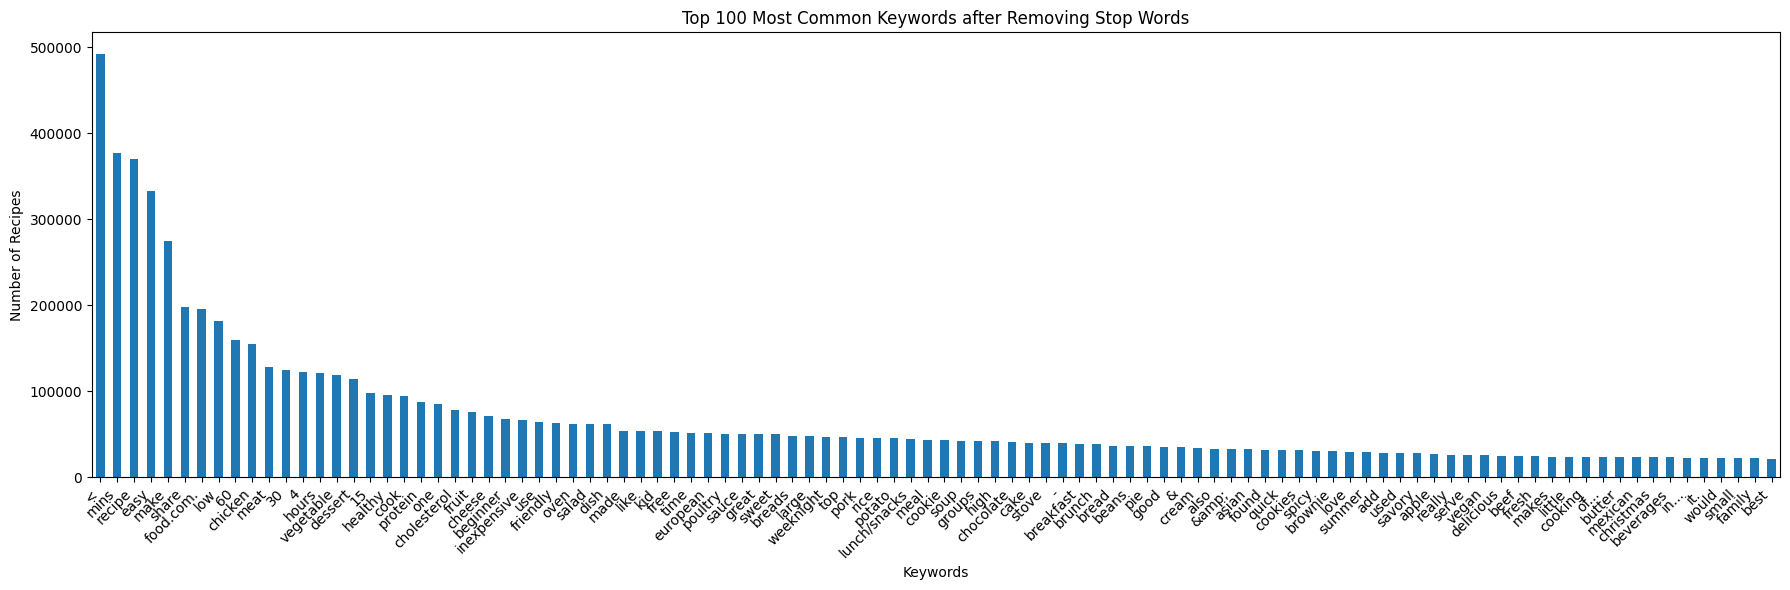

In [ ]:
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
articles = ['a', 'an', 'the']
stop_words.extend(articles)
stop_words_list = list(stop_words)
# print(stop_words_list)

recipes_keywords_clean = recipes_keywords[~recipes_keywords.index.isin(stop_words_list)]
# recipes_keywords_clean = recipes_keywords_clean[recipes_keywords_clean.index.str.match(r'\w')]
# print(recipes_keywords_clean.head(20))

fig, axs = plt.subplots(1, 1, figsize=(18, 6))
recipes_keywords_clean.head(100).plot(ax=axs, kind='bar')
axs.set_ylabel('Number of Recipes')
axs.set_xlabel('Keywords')
axs.set_title('Top 100 Most Common Keywords after Removing Stop Words')
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#create new column without stopwords
new_recipe['Combined_Features_Clean'] = new_recipe['Combined_Features'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_list]))


<ipython-input-31-9835f169fc11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_recipe['Combined_Features_Clean'] = new_recipe['Combined_Features'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_list]))


In [ ]:
new_recipe

,Name,RecipeCategory,Description,Keywords_string,RecipeIngredientQuantities,RecipeIngredientParts,RecipeInstructions,AggregatedRating,ReviewCount,Combined_Features,Combined_Features_Clean
0,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,Make and share this Low-Fat Berry Blue Frozen ...,Dessert Low Protein Low Cholesterol Healthy Fr...,"[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...","[Toss 2 cups berries with sugar., Let stand fo...",4.5,4.0,Low-Fat Berry Blue Frozen Dessert Frozen Desse...,Low-Fat Berry Blue Frozen Dessert Frozen Desse...
1,Biryani,Chicken Breast,Make and share this Biryani recipe from Food.com.,Chicken Thigh & Leg Chicken Poultry Meat Asian...,"[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",[Soak saffron in warm milk for 5 minutes and p...,3.0,1.0,Biryani Chicken Breast Make and share this Bir...,Biryani Chicken Breast Make share Biryani reci...
2,Best Lemonade,Beverages,This is from one of my first Good House Keepi...,Low Protein Low Cholesterol Healthy Summer < 6...,"[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...","[Into a 1 quart Jar with tight fitting lid, pu...",4.5,10.0,Best Lemonade Beverages This is from one of my...,Best Lemonade Beverages one first Good House K...
3,Carina's Tofu-Vegetable Kebabs,Soy/Tofu,This dish is best prepared a day in advance to...,Beans Vegetable Low Cholesterol Weeknight Broi...,"[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...","[Drain the tofu, carefully squeezing out exces...",4.5,2.0,Carina's Tofu-Vegetable Kebabs Soy/Tofu This d...,Carina's Tofu-Vegetable Kebabs Soy/Tofu dish b...
4,Cabbage Soup,Vegetable,Make and share this Cabbage Soup recipe from F...,Low Protein Vegan Low Cholesterol Healthy Wint...,"[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...","[Mix everything together and bring to a boil.,...",4.5,11.0,Cabbage Soup Vegetable Make and share this Cab...,Cabbage Soup Vegetable Make share Cabbage Soup...
...,...,...,...,...,...,...,...,...,...,...,...
522512,Meg's Fresh Ginger Gingerbread,Dessert,Make and share this Meg's Fresh Ginger Gingerb...,< 4 Hours,"[3, 1⁄2, 1⁄2, 1⁄4, 1⁄4, 1, 1⁄4, 1 1⁄2, 1, 1⁄2,...","[fresh ginger, unsalted butter, dark brown sug...",[Preheat oven to 350&deg;F Grease an 8x8 cake ...,NaN,NaN,Meg's Fresh Ginger Gingerbread Dessert Make an...,Meg's Fresh Ginger Gingerbread Dessert Make sh...
522513,Roast Prime Rib au Poivre with Mixed Peppercorns,Very Low Carbs,"White, black, green, and pink peppercorns add ...",High Protein High In... < 4 Hours,"[9, 2, 4, 2, 1⁄3, 3 1⁄2, 1⁄3]","[Dijon mustard, garlic, peppercorns, shallot, ...",[Position rack in center of oven and preheat t...,NaN,NaN,Roast Prime Rib au Poivre with Mixed Peppercor...,Roast Prime Rib au Poivre Mixed Peppercorns Lo...
522514,Kirshwasser Ice Cream,Ice Cream,Make and share this Kirshwasser Ice Cream reci...,Dessert < 4 Hours,"[3, 3, 1⁄2, 1⁄2, 2, 2]","[half-and-half, heavy cream, brandy, sugar]",[heat half and half and heavy cream to a simme...,NaN,NaN,Kirshwasser Ice Cream Ice Cream Make and share...,Kirshwasser Ice Cream Ice Cream Make share Kir...
522515,Quick & Easy Asian Cucumber Salmon Rolls,Canadian,"Extremely quick and easy to make, these are gr...",< 15 Mins Easy,"[4, 1⁄4, 1, 1⁄2, 8 1⁄2, 40]","[wasabi paste, dill, English cucumber, smoked ...","[In a small bowl, combine mayo and wasabi past...",NaN,NaN,Quick & Easy Asian Cucumber Salmon Rolls Canad...,Quick & Easy Asian Cucumber Salmon Rolls Canad...


In [ ]:
print("Name:", new_recipe.iloc[522513]['Name'])
print("RecipeCategory:", new_recipe.iloc[522513]['RecipeCategory'])
print("Description:", new_recipe.iloc[522513]['Description'])
print("Keywords:", new_recipe.iloc[522513]['Keywords_string'])

print("New combined_features:", new_recipe.iloc[522513]['Combined_Features_Clean'])

print()
print(new_recipe['Combined_Features_Clean'].str.len().describe())



Name: Roast Prime Rib au Poivre with Mixed Peppercorns
RecipeCategory: Very Low Carbs
Description: White, black, green, and pink peppercorns add wonderful flavor to this very special prime rib. If possible, search out a butcher who carries dry-aged beef-it&rsquo;s more tender, flavorful, and juicy than the non-aged variety. A full-bodied California Cabernet Sauvignon or French Bordeaux is the perfect wine to serve. As for vegetables, mix butter and tarragon with cooked baby carrots and green beans for a delicious accompaniment.
Keywords: High Protein High In... < 4 Hours
New combined_features: Roast Prime Rib au Poivre Mixed Peppercorns Low Carbs White, black, green, pink peppercorns add wonderful flavor special prime rib. possible, search butcher carries dry-aged beef-it&rsquo;s tender, flavorful, juicy non-aged variety. full-bodied California Cabernet Sauvignon French Bordeaux perfect wine serve. vegetables, mix butter tarragon cooked baby carrots green beans delicious accompaniment.

In [ ]:
# prompt: add Combined_Feature_Clean column to recipes_w_cleaning_time and save to parquet

recipes_w_cleaning_time = pd.read_parquet('recipes_w_cleaning_time.parquet')

# Create a new column without stopwords
recipes_w_cleaning_time['Combined_Features_Clean'] = new_recipe['Combined_Features_Clean']

# Save the DataFrame to a new parquet file
recipes_w_cleaning_time.to_parquet('recipes_w_cleaning_time_combined_features.parquet')


In [ ]:
# prompt: print value of row with max length in Combined_Features_Clean column.  Find the lengths of the Name, Description, Keywords_String, and RecipeCategory value

max_length_row = new_recipe['Combined_Features_Clean'].str.len().idxmax()

name_length = len(new_recipe.loc[max_length_row, 'Name'])
description_length = len(new_recipe.loc[max_length_row, 'Description'])
keywords_length = len(new_recipe.loc[max_length_row, 'Keywords_string'])
recipe_category_length = len(new_recipe.loc[max_length_row, 'RecipeCategory'])

print(f"Value of row with max length in Combined_Features_Clean column: {new_recipe.loc[max_length_row, 'Combined_Features_Clean']}")
print(f"Name length: {name_length}")
print(f"Description length: {description_length}")
print(f"Keywords_String length: {keywords_length}")
print(f"RecipeCategory length: {recipe_category_length}")


Value of row with max length in Combined_Features_Clean column: Favorite Buttercream Icing Decorating Dessert wonderful icing used icing cakes cookies well borders art work cakes. makes delicious filling also layers cakes Fondant Icing. make roses takes 3 days dry depending humidity. many versions “Buttercream” icing. made eggs butter. varieties, cook sugar softball stage. Others 100% shortening combination shortening butter. decorator favorite. personally think best taste textured recipe one cook sugar, add whipped eggs use pounds butter per batch. BUT…. live state easily 100 degrees days end summer know butter hot days. melts! greasy puddle melted icing cake plate something want look eat. top notch decorators options don’t. huge refrigerators store cakes in, refrigerated vehicles use deliver decorated cakes. even know refuse deliver all. want cake, come get it’s responsibility melts. decorators don’t even turn ovens wedding cake less $2000. following recipes Buttercream Icing hold pr

<ipython-input-35-83f0f42ce5e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Combined_Features_Clean_word_count'] = data['Combined_Features_Clean'].str.split().str.len()
<ipython-input-35-83f0f42ce5e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Keywords_word_count'] = data['Keywords_string'].str.split().str.len()
<ipython-input-35-83f0f42ce5e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

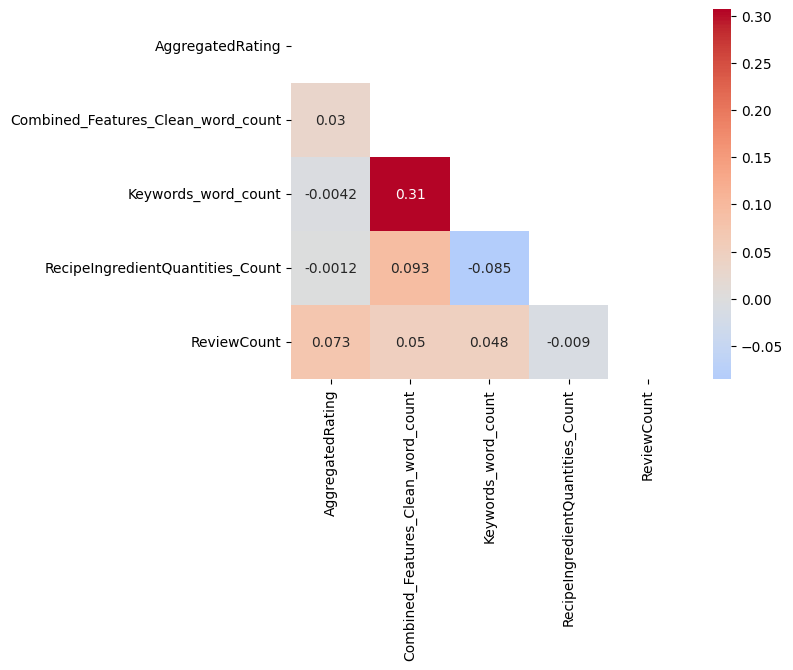

In [ ]:
import seaborn as sns
import numpy as np

# Create a new DataFrame with only the desired columns
data = new_recipe[['AggregatedRating', 'Combined_Features_Clean', 'Keywords_string', 'RecipeIngredientQuantities', 'ReviewCount']]

# Calculate the number of words in each row of the 'Combined_Features_Clean' column.
data['Combined_Features_Clean_word_count'] = data['Combined_Features_Clean'].str.split().str.len()
data['Keywords_word_count'] = data['Keywords_string'].str.split().str.len()
data['RecipeIngredientQuantities_Count'] = data['RecipeIngredientQuantities'].str.len()

data = data[['AggregatedRating', 'Combined_Features_Clean_word_count', 'Keywords_word_count', 'RecipeIngredientQuantities_Count', 'ReviewCount']]

# Create a heatmap
df = data.corr()
mask = np.triu(np.ones_like(df, dtype=bool))

sns.heatmap(df, mask=mask, center=0,  annot=True, cmap='coolwarm')
plt.show()


# Reviews.parquet EDA

In [ ]:
# prompt: show columns of reviews

print(reviews.columns)


NameError: name 'reviews' is not defined

In [ ]:
# prompt: histogram of RecipeId

plt.figure(figsize=(18, 6))
reviews['RecipeId'].plot.hist(bins=2000)
plt.xlabel('RecipeId')
plt.ylabel('Frequency')
plt.title('Distribution of RecipeId in reviews')
plt.show()


In [ ]:
# prompt: histogram of Rating

# import pandas as pd
# import matplotlib.pyplot as plt

# recipes = pd.read_parquet('recipes.parquet')

# Create a histogram of the Rating column
plt.figure(figsize=(18, 6))
reviews['Rating'].plot.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [ ]:
# prompt: histogram of DateSubmitted

# import pandas as pd
# import matplotlib.pyplot as plt

# reviews = pd.read_parquet('reviews.parquet')

plt.figure(figsize=(18, 6))
reviews['DateSubmitted'].plot.hist()
plt.xlabel('DateSubmitted')
plt.ylabel('Frequency')
plt.title('Distribution of DateSubmitted')
plt.show()
